In [1]:
import importlib
import functions

importlib.reload(functions)


<module 'functions' from 'c:\\Users\\Thomas\\Desktop\\cpl_analysis_naman\\functions.py'>

## 02 Loading the folder that contains our data

In [2]:
import glob
import getpass
user= (getpass.getuser())
print("Hello", user)

base='C:\\Users\\{}\\Dropbox\\CPLab'.format(user)
files = glob.glob(base+'\\all_data_mat_filtered\\*.mat')
savepath = base+'\\results\\'
print(files)

Hello Thomas
['C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk1_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk3_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk5_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk6_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk1_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk3_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk5_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk6_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230609_dk1_BW_nocontext_day1.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230609_dk3_BW_nocontext_day1.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230610_dk

In [3]:
keyboard_dict={'98':'b','119':'w','120':'nc','49':'1','48':'0'}

In [5]:
import os
import h5py
for file in files:
    # Initialize an empty DataFrame to store the results for all epochs
    ## Get the date, mouse_id and task from the file name
    #compiled_data_all_epochs = pd.DataFrame()

    base_name = os.path.basename(file)
    base_name, _ = os.path.splitext(base_name)

    date, mouse_id, task=functions.exp_params(base_name)
    print(date, mouse_id, task)
    ## Open the file
    f=h5py.File(file, 'r')        
    channels = list(f.keys())
    print(channels)


20230529 dk1 nocontext
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
20230529 dk3 nocontext
['Keyboard', 'Ref', 'Respirat', 'file']
20230529 dk5 nocontext
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
20230529 dk6 nocontext
['LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Memory', 'Ref', 'Respirat', 'file']
20230531 dk1 nocontextday2
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
20230531 dk3 nocontextday2
['Keyboard', 'Ref', 'Respirat', 'file']
20230531 dk5 nocontextday2
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
20230531 dk6 nocontextday2
['LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Memory', 'Ref', 'Respirat', 'file']
20230609 dk1 BWnocontext
['LFP1_vHp', 'LFP2_vHp', 'L

## 03  Looping through all the data files

In [8]:
import os
import h5py
import numpy as np
import pandas as pd

#files=['C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230610_dk3_BW_nocontext_day2.mat']
events_codes_all = {}
compiled_data_all_epochs = pd.DataFrame()

for file in files:
    # Initialize an empty DataFrame to store the results for all epochs
    ## Get the date, mouse_id and task from the file name
    #compiled_data_all_epochs = pd.DataFrame()

    base_name = os.path.basename(file)
    base_name, _ = os.path.splitext(base_name)

    date, mouse_id, task=functions.exp_params(base_name)
    print(date, mouse_id, task)
    ## Open the file
    f=h5py.File(file, 'r')
    try:
        channels = list(f.keys())
        print(channels)

        if 'Keyboard' in channels:
            events = f['Keyboard']
        elif 'keyboard' in channels:
            events = f['keyboard']
        elif 'memory' in channels:
            events = f['memory']
        elif 'Memory' in channels:
            events = f['Memory']

        events_codes=np.array(events['codes'][0])
        events_times=np.array(events['times'][0])
        events_codes_all[base_name] = events_codes
        #Generating epochs from events (epochs are basically start of a trial and end of a trial)
        epochs=functions.generate_epochs_with_first_event(events_codes, events_times)

        # Experiment Start time
        first_event=events_times[0]

        for channeli in channels:
            if "AON" in channeli or  "vHp" in channeli :
                
                channel_id=channeli
                
                # Extracting raw data and time
                data_all=f[channeli]
                raw_data=np.array(data_all['values']).flatten()
                raw_time = np.array(data_all['times']).flatten()
                sampling_rate = int(1/data_all['interval'][0][0])
                print(raw_data.shape, raw_time.shape, sampling_rate)
                
                # Normalizing the data by subtracting the mean and std of data 30sec before the first event
                normalized_data,time,data_before=functions.data_normalization(raw_data,raw_time,first_event, sampling_rate)

                
                # Applying a notch filter
                notch_filtered_data=functions.iir_notch(normalized_data, sampling_rate,60)
                total=notch_filtered_data
                
                # Extracting the bands
                beta=functions.beta_band(notch_filtered_data, sampling_rate)
                gamma=functions.gamma_band(notch_filtered_data, sampling_rate)
                theta=functions.theta_band(notch_filtered_data, sampling_rate)

                all_bands=[total,beta, gamma, theta]

                for i,epochi in enumerate(epochs):
                    compiled_data = pd.DataFrame()

                    trial_timestamp = epochi[0][0]
                    trial_type = epochi[0][1]
                    dig_type = epochi[1, 1]
                    print(dig_type)
                    dig_timestamp = epochi[1, 0]
                    print(trial_timestamp,trial_type,dig_timestamp,dig_type)
                    for bandi in all_bands:
                        data_trial_before, data_trial_after=functions.extract_trial_data(bandi,time,trial_timestamp,sampling_rate)
                        data_dig_before, data_dig_after=functions.extract_dig_data(bandi,time,dig_timestamp,sampling_rate)

                                            # Create a DataFrame for the current bandi
                        bandi_data = pd.DataFrame({
                            'data_trial_before': [functions.calculate_power_1D(data_trial_before)],
                            'data_trial_after': [functions.calculate_power_1D(data_trial_after)],
                            'data_dig_before': [functions.calculate_power_1D(data_dig_before)],
                            'data_dig_after': [functions.calculate_power_1D(data_dig_after)]
                        })
                        
                        # Concatenate the current bandi DataFrame with the compiled_data DataFrame along axis=1
                        compiled_data = pd.concat([compiled_data, bandi_data], axis=1)
                    compiled_data.columns = ['total_power_pre_door', 'total_power_post_door', 'total_power_pre_odor', 'total_power_post_odor',
                                'beta_power_pre_door', 'beta_power_post_door', 'beta_power_pre_odor', 'beta_power_post_odor',
                                'gamma_power_pre_door', 'gamma_power_post_door', 'gamma_power_pre_odor', 'gamma_power_post_odor',
                                'theta_power_pre_door', 'theta_power_post_door', 'theta_power_pre_odor', 'theta_power_post_odor']
                    compiled_data.insert(0, 'rat', mouse_id)
                    compiled_data.insert(1, 'date', date)
                    compiled_data.insert(2, 'experiment', task)
                    compiled_data.insert(3, 'channel', channel_id)
                    compiled_data.insert(4, 'trial', i)
                    compiled_data.insert(5, 'side', keyboard_dict[str(int(trial_type))])
                    compiled_data.insert(6, 'correct?', keyboard_dict[str(int(dig_type))])
                    compiled_data.insert(7, 'first 30 seconds power', functions.calculate_power_1D(data_before))
                    compiled_data_all_epochs = pd.concat([compiled_data_all_epochs, compiled_data], axis=0, ignore_index=True)
    finally:
        f.close()
compiled_data_all_epochs.to_csv(os.path.join(savepath,'compiled_data.csv'), index=False)


20230529 dk1 nocontext
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
(1516022,) (1516022,) 2000
normalizing data
notch filter applied
filtering beta band
filtering gamma band
filtering theta band
49.0
181.20385499999998 120.0 182.713855 49.0
Extracted trial data from index 362408 to 366408
Extracted dig data before from index 361428 to 365428
Extracted dig data after from index 365428 to 369428
Extracted trial data from index 362408 to 366408
Extracted dig data before from index 361428 to 365428
Extracted dig data after from index 365428 to 369428
Extracted trial data from index 362408 to 366408
Extracted dig data before from index 361428 to 365428
Extracted dig data after from index 365428 to 369428
Extracted trial data from index 362408 to 366408
Extracted dig data before from index 361428 to 365428
Extracted dig data after from index 365428 to 369428
48.0
237.771855 120.0 239.46185499999999 48.0
Extracted trial data f

c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thomas\Desktop\cpl_analysis_naman\fu

Extracted trial data from index 646153 to 650153
Extracted dig data before from index 645533 to 649533
Extracted dig data after from index 649533 to 653533
Extracted trial data from index 646153 to 650153
Extracted dig data before from index 645533 to 649533
Extracted dig data after from index 649533 to 653533
(757277,) (757277,) 2000
normalizing data
notch filter applied
filtering beta band
filtering gamma band
filtering theta band
49.0
18.434154999999997 120.0 20.91415 49.0
Extracted trial data from index 36868 to 40868
Extracted dig data before from index 37828 to 41828
Extracted dig data after from index 41828 to 45828
Extracted trial data from index 36868 to 40868
Extracted dig data before from index 37828 to 41828
Extracted dig data after from index 41828 to 45828
Extracted trial data from index 36868 to 40868
Extracted dig data before from index 37828 to 41828
Extracted dig data after from index 41828 to 45828
Extracted trial data from index 36868 to 40868
Extracted dig data bef

c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\

Extracted trial data from index 388980 to 392980
Extracted dig data before from index 389040 to 393040
Extracted dig data after from index 393040 to 397040
Extracted trial data from index 388980 to 392980
Extracted dig data before from index 389040 to 393040
Extracted dig data after from index 393040 to 397040
Extracted trial data from index 388980 to 392980
Extracted dig data before from index 389040 to 393040
Extracted dig data after from index 393040 to 397040
49.0
242.50214999999997 120.0 244.27215499999997 49.0
Extracted trial data from index 485004 to 489004
Extracted dig data before from index 484544 to 488544
Extracted dig data after from index 488544 to 492544
Extracted trial data from index 485004 to 489004
Extracted dig data before from index 484544 to 488544
Extracted dig data after from index 488544 to 492544
Extracted trial data from index 485004 to 489004
Extracted dig data before from index 484544 to 488544
Extracted dig data after from index 488544 to 492544
Extracted 

c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

filtering theta band
49.0
18.434154999999997 120.0 20.91415 49.0
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
49.0
117.14415499999998 120.0 118.77414999999999 49.0
Extracted trial data from index 234289 to 238289
Extracted dig data before from index 233549 to 237549
Extracted dig data after from index 237549 to 241549
Extracted trial data from index 234289 to 238289
Extracted dig data before from index 233549 to 237549
Extracted dig data aft

c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\

normalizing data
notch filter applied
filtering beta band
filtering gamma band
filtering theta band
49.0
18.434154999999997 120.0 20.91415 49.0
Extracted trial data from index 36868 to 40868
Extracted dig data before from index 37828 to 41828
Extracted dig data after from index 41828 to 45828
Extracted trial data from index 36868 to 40868
Extracted dig data before from index 37828 to 41828
Extracted dig data after from index 41828 to 45828
Extracted trial data from index 36868 to 40868
Extracted dig data before from index 37828 to 41828
Extracted dig data after from index 41828 to 45828
Extracted trial data from index 36868 to 40868
Extracted dig data before from index 37828 to 41828
Extracted dig data after from index 41828 to 45828
49.0
117.14415499999998 120.0 118.77414999999999 49.0
Extracted trial data from index 234288 to 238288
Extracted dig data before from index 233548 to 237548
Extracted dig data after from index 237548 to 241548
Extracted trial data from index 234288 to 2382

c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\

Extracted trial data from index 646152 to 650152
Extracted dig data before from index 645532 to 649532
Extracted dig data after from index 649532 to 653532
Extracted trial data from index 646152 to 650152
Extracted dig data before from index 645532 to 649532
Extracted dig data after from index 649532 to 653532
Extracted trial data from index 646152 to 650152
Extracted dig data before from index 645532 to 649532
Extracted dig data after from index 649532 to 653532
(757278,) (757278,) 2000
normalizing data
notch filter applied
filtering beta band
filtering gamma band
filtering theta band
49.0
18.434154999999997 120.0 20.91415 49.0
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig da

c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\

Extracted dig data before from index 312445 to 316445
Extracted dig data after from index 316445 to 320445
Extracted trial data from index 310425 to 314425
Extracted dig data before from index 312445 to 316445
Extracted dig data after from index 316445 to 320445
Extracted trial data from index 310425 to 314425
Extracted dig data before from index 312445 to 316445
Extracted dig data after from index 316445 to 320445
Extracted trial data from index 310425 to 314425
Extracted dig data before from index 312445 to 316445
Extracted dig data after from index 316445 to 320445
49.0
194.490155 120.0 196.520155 49.0
Extracted trial data from index 388981 to 392981
Extracted dig data before from index 389041 to 393041
Extracted dig data after from index 393041 to 397041
Extracted trial data from index 388981 to 392981
Extracted dig data before from index 389041 to 393041
Extracted dig data after from index 393041 to 397041
Extracted trial data from index 388981 to 392981
Extracted dig data before 

c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Thomas\anaconda3\envs\lfp_analysis\lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thomas\Desktop\cpl_analysis_naman\fu

normalizing data
notch filter applied
filtering beta band
filtering gamma band
filtering theta band
49.0
18.434154999999997 120.0 20.91415 49.0
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
Extracted trial data from index 36869 to 40869
Extracted dig data before from index 37829 to 41829
Extracted dig data after from index 41829 to 45829
49.0
117.14415499999998 120.0 118.77414999999999 49.0
Extracted trial data from index 234289 to 238289
Extracted dig data before from index 233549 to 237549
Extracted dig data after from index 237549 to 241549
Extracted trial data from index 234289 to 2382

c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)
c:\Users\Thomas\Desktop\cpl_analysis_naman\functions.py:544: RuntimeWarning: invalid value encountered in scalar divide
  power = np.sum(signal ** 2) / len(signal)


filtering gamma band
filtering theta band
49.0
94.02238999999999 120.0 100.732385 49.0
Extracted trial data from index 188045 to 192045
Extracted dig data before from index 197465 to 201465
Extracted dig data after from index 201465 to 205465
Extracted trial data from index 188045 to 192045
Extracted dig data before from index 197465 to 201465
Extracted dig data after from index 201465 to 205465
Extracted trial data from index 188045 to 192045
Extracted dig data before from index 197465 to 201465
Extracted dig data after from index 201465 to 205465
Extracted trial data from index 188045 to 192045
Extracted dig data before from index 197465 to 201465
Extracted dig data after from index 201465 to 205465
49.0
152.72838499999997 120.0 154.118385 49.0
Extracted trial data from index 305457 to 309457
Extracted dig data before from index 304237 to 308237
Extracted dig data after from index 308237 to 312237
Extracted trial data from index 305457 to 309457
Extracted dig data before from index 3

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the compiled data
compiled_data_all_epochs = pd.read_csv('compiled_data.csv')

# Filter the DataFrame for the required rows
filtered_data = compiled_data_all_epochs[compiled_data_all_epochs['experiment'].isin(['BWnocontext', 'nocontext', 'BWcontext'])]

# Melt the DataFrame to long format
melted_data = pd.melt(filtered_data, id_vars=['experiment'], value_vars=['total_power_pre_door', 'total_power_post_door', 'total_power_pre_odor', 'total_power_post_odor'], var_name='PowerType', value_name='PowerValue')
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the melted data
melted_data = melted_data.groupby('PowerType').apply(lambda x: remove_outliers(x, 'PowerValue')).reset_index(drop=True)


C:\Users\sinha\AppData\Local\Temp\ipykernel_36820\3589640883.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_data = melted_data.groupby('PowerType').apply(lambda x: remove_outliers(x, 'PowerValue')).reset_index(drop=True)


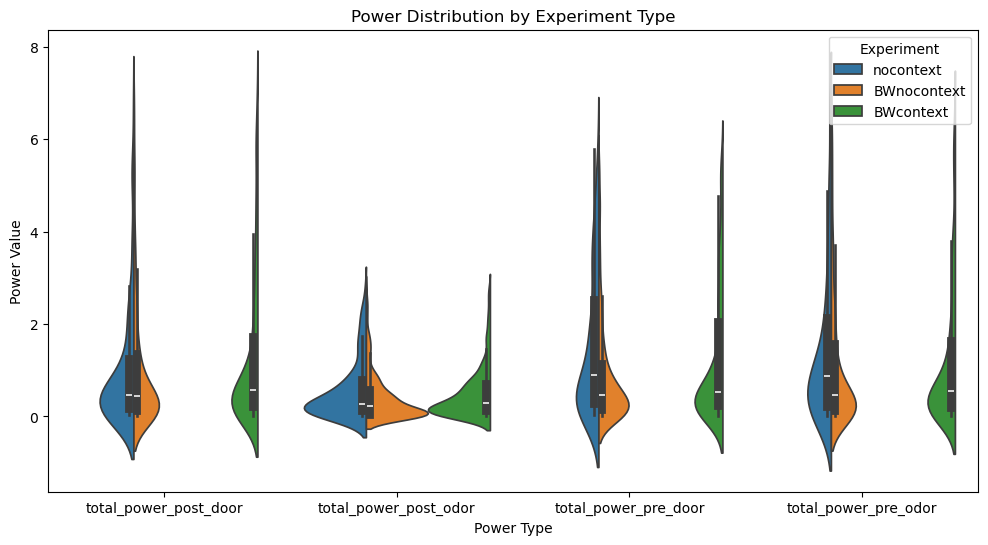

In [10]:
import seaborn as sns

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='PowerType', y='PowerValue', hue='experiment', data=melted_data, split=True)
plt.title('Power Distribution by Experiment Type')
plt.xlabel('Power Type')
plt.ylabel('Power Value')
plt.legend(title='Experiment')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the compiled data
compiled_data_all_epochs = pd.read_csv('compiled_data.csv')

# Filter the DataFrame for the required rows
filtered_data = compiled_data_all_epochs[compiled_data_all_epochs['experiment'].isin(['BWnocontext', 'nocontext', 'BWcontext'])]

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to create the bar plot for a given power type
def create_bar_plot(power_type):
    # Melt the DataFrame to long format
    value_vars = [f'{power_type}_pre_door', f'{power_type}_post_door', f'{power_type}_pre_odor', f'{power_type}_post_odor']
    melted_data = pd.melt(filtered_data, id_vars=['experiment'], value_vars=value_vars, var_name='PowerType', value_name='PowerValue')

    # Remove outliers from the melted data
    melted_data = melted_data.groupby('PowerType').apply(lambda x: remove_outliers(x, 'PowerValue')).reset_index(drop=True)

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='PowerType', y='PowerValue', hue='experiment', data=melted_data, ci='sd', order=value_vars)
    plt.title(f'{power_type.capitalize()} Power Distribution by Experiment Type')
    plt.xlabel('Power Type')
    plt.ylabel('Power Value')
    plt.legend(title='Experiment')
    plt.show()

# Create bar plots for 'total_power', 'beta_power', 'gamma_power', and 'theta_power'
create_bar_plot('total_power')
create_bar_plot('beta_power')
create_bar_plot('gamma_power')
create_bar_plot('theta_power')